In [1]:
import os

In [2]:
import glob

In [4]:
from IPython.display import Image, display

In [5]:
from IPython import display

In [6]:
display.clear_output()

## **Check GPU availabel of not**

In [7]:
!nvidia-smi

Tue Oct 17 14:09:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
HOME = os.getcwd()

In [9]:
print(HOME)

/content


## **Installing Ultralytics**

In [10]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 8.8 MB/s eta 0:00:00


### Checking whether YOLOv8 is installed and its working fine

In [11]:
import ultralytics

In [13]:
ultralytics.checks()

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


## **Importing the Potholes Images Dataset from RoboFlow**

In [14]:
!mkdir {HOME}/datasets

In [15]:
%cd {HOME}/datasets

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-(Bounding-Box)-1 in yolov5pytorch:: 100%|██████████| 800/800 [00:00<00:00, 6466.43it/s]


## **Train the YOLOv8 Model on the Custom dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/Object-Detection-(Bounding-Box)-1


In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Pothole-detection/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Pothole-detection/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [26]:
!ls {HOME}//runs/detect/train2

args.yaml					    P_curve.png		 train_batch1381.jpg
confusion_matrix_normalized.png			    PR_curve.png	 train_batch1382.jpg
confusion_matrix.png				    R_curve.png		 train_batch1.jpg
events.out.tfevents.1697552555.7affac2f6631.7066.0  results.csv		 train_batch2.jpg
F1_curve.png					    results.png		 val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					    train_batch1380.jpg  weights


## Displaying the confusion metrics

/content


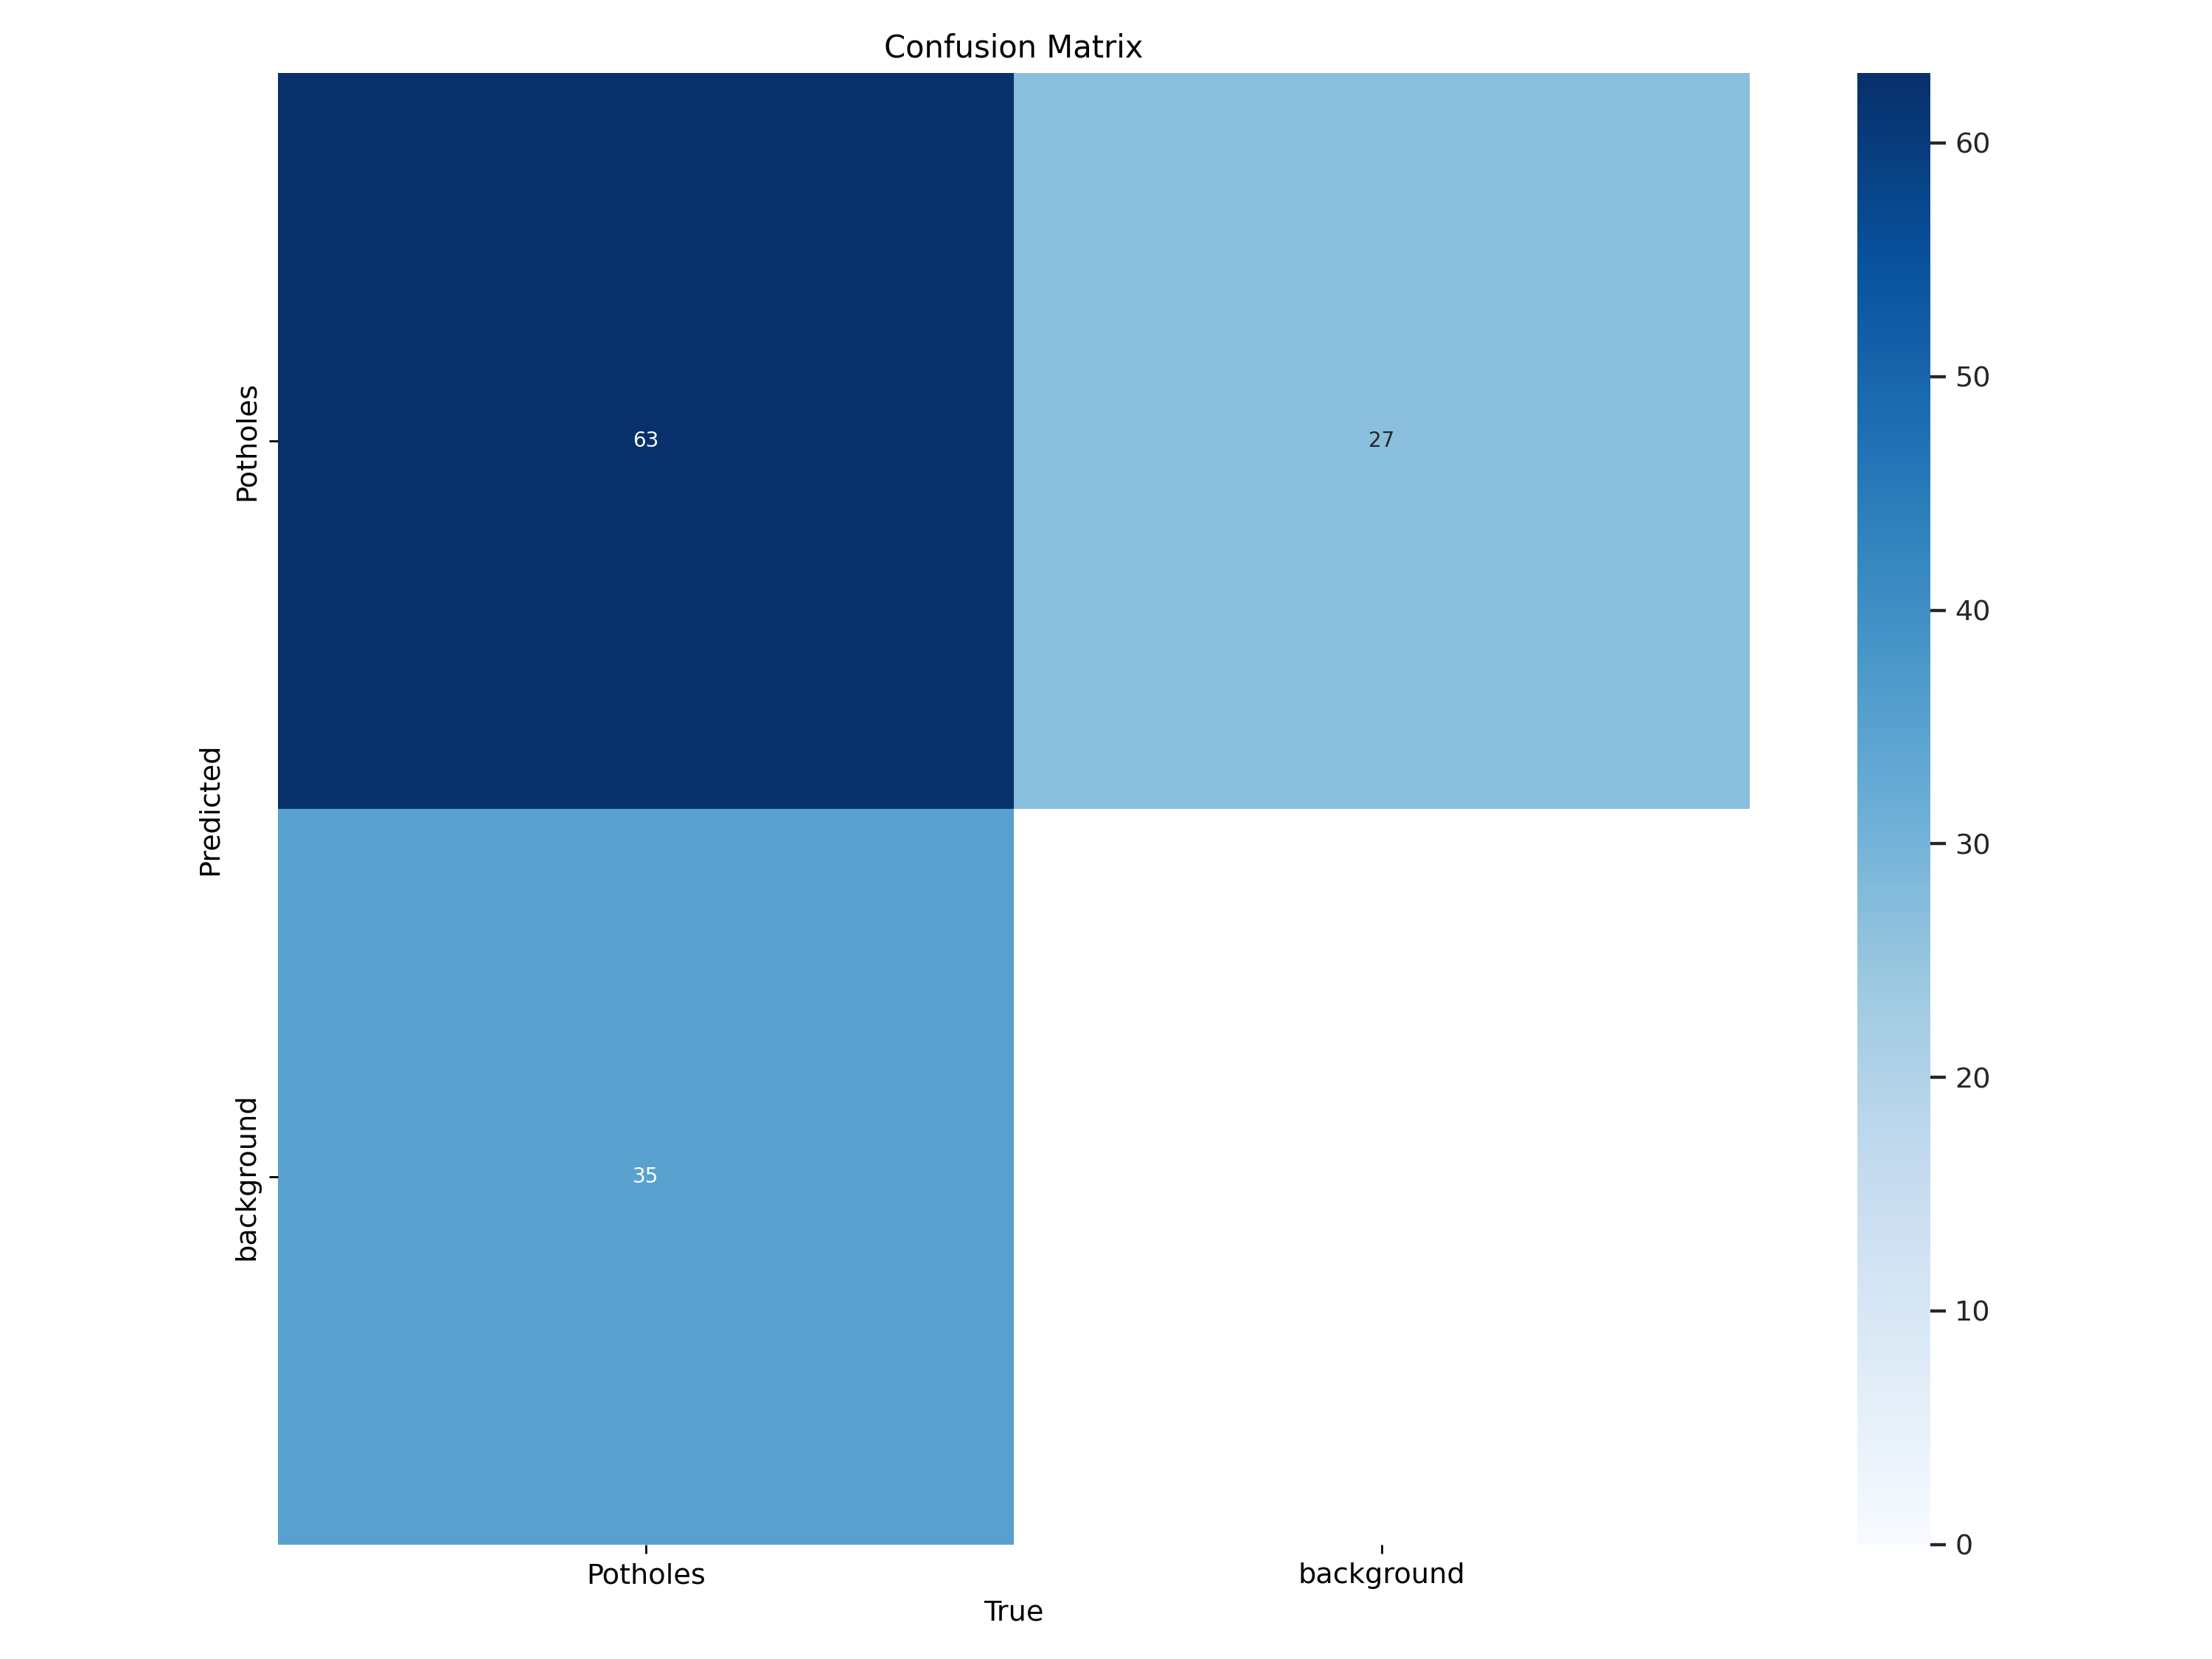

In [27]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/confusion_matrix.png', width = 900)

## Training and validation loss

/content


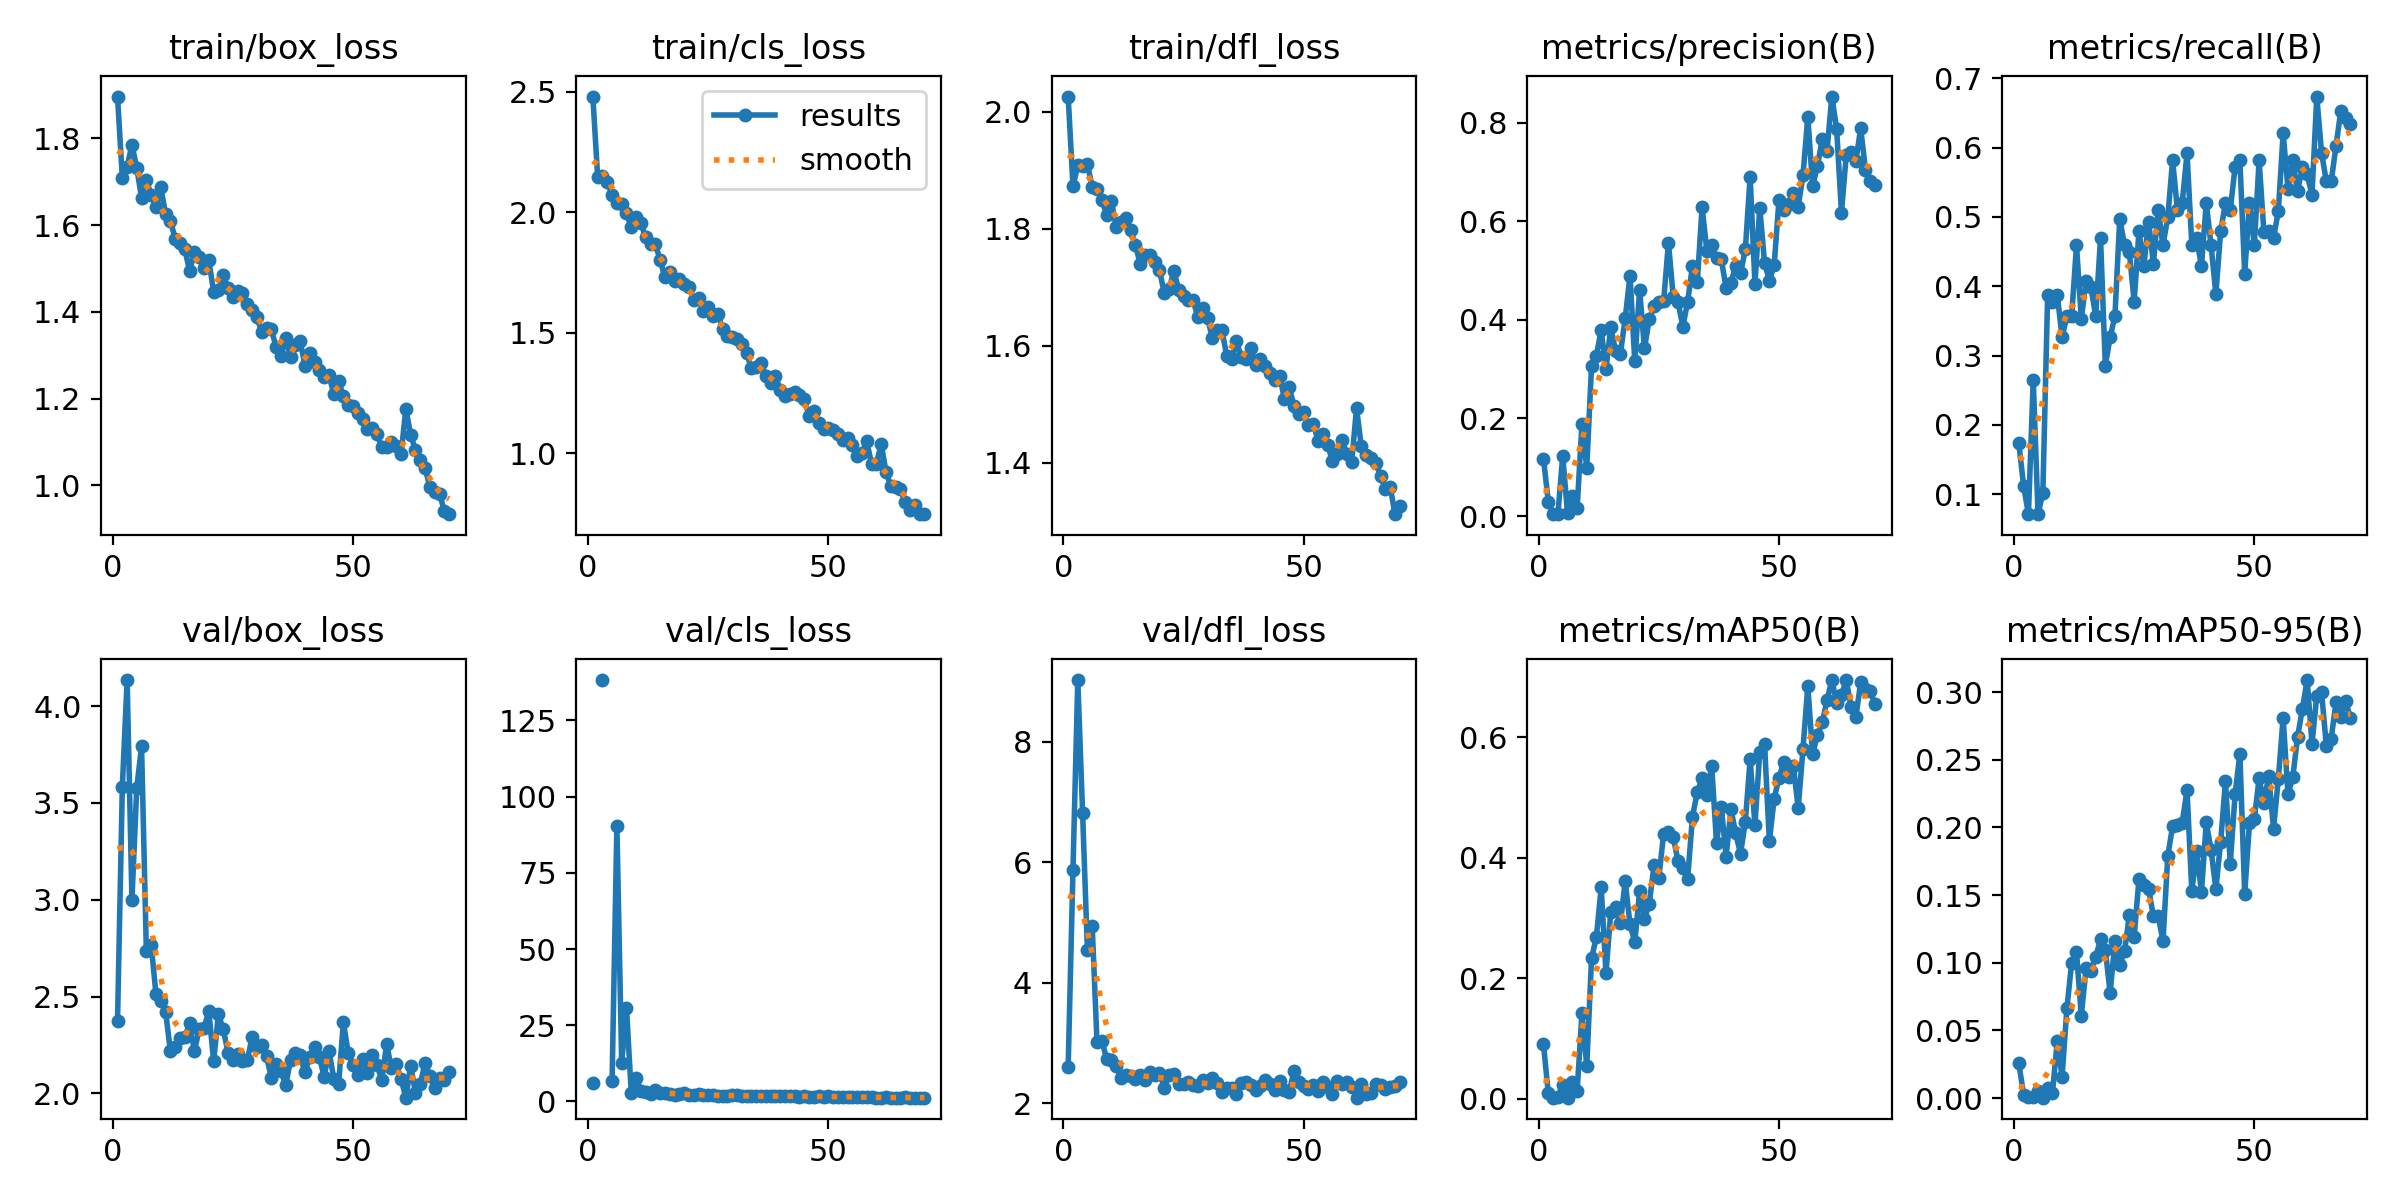

In [28]:
%cd {HOME}
Image(filename = f'{HOME}/runs/detect/train2/results.png', width = 600)

/content


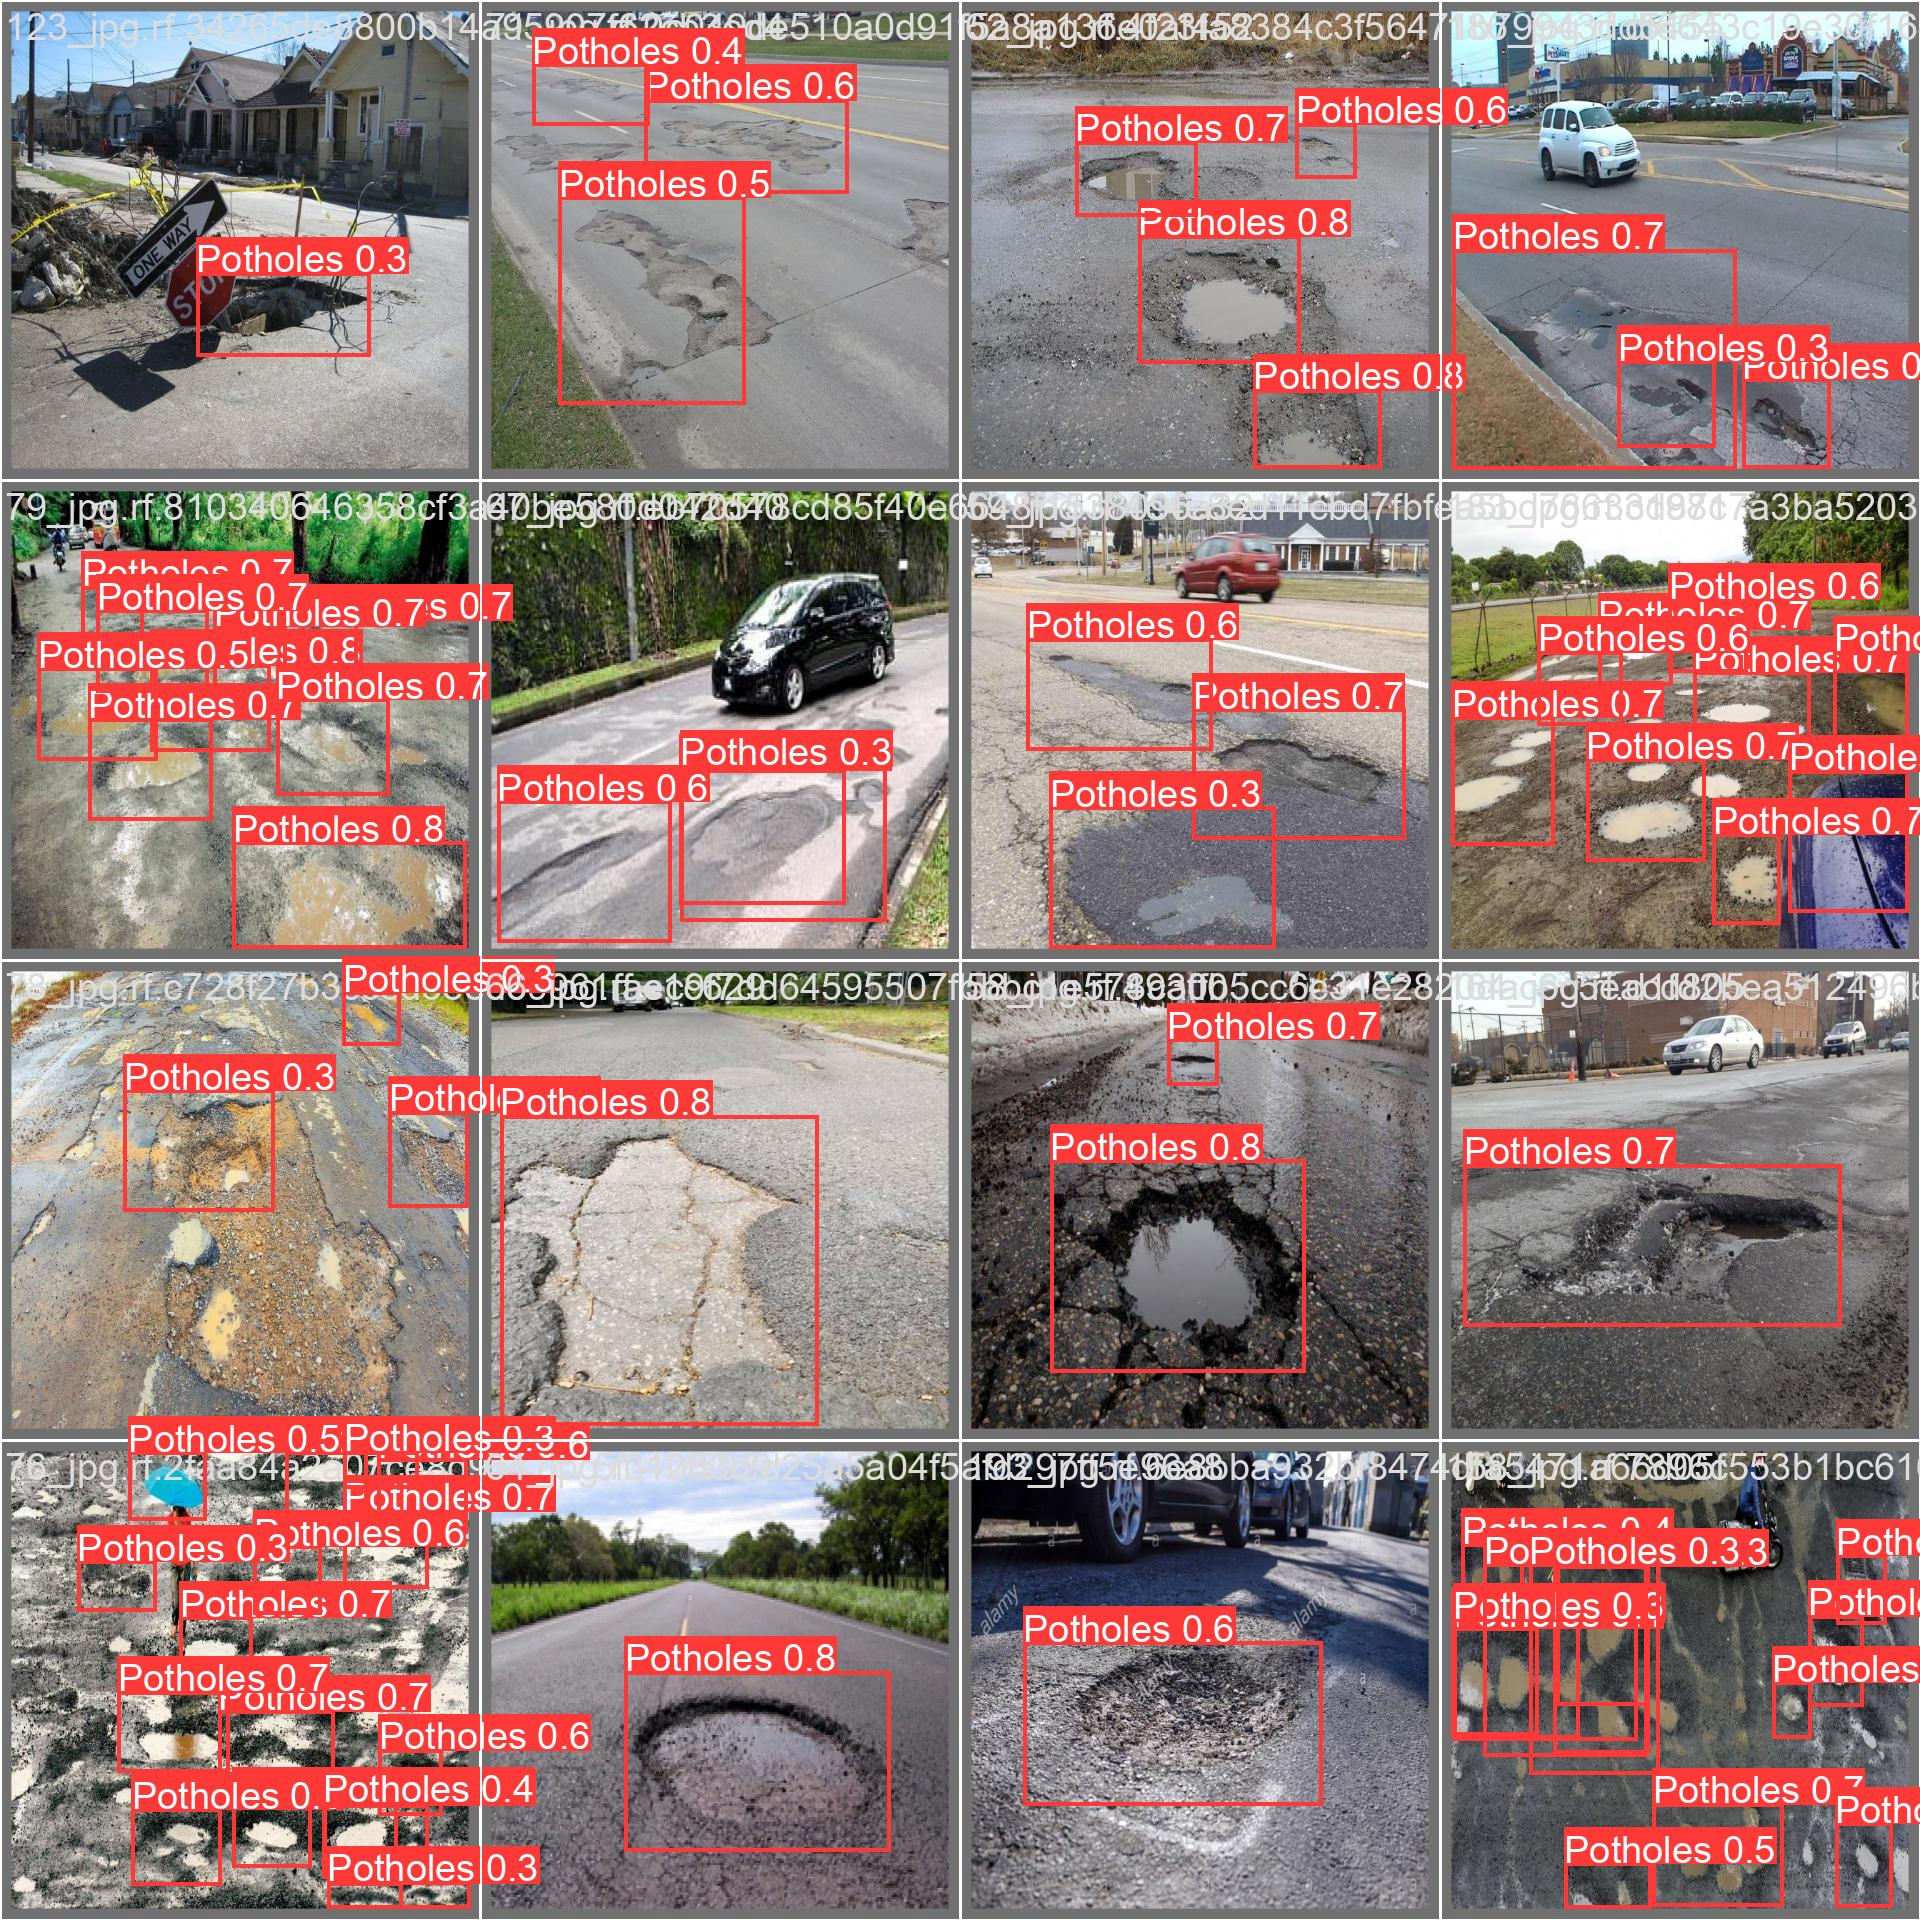

In [29]:
 %cd {HOME}
 Image(filename = f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width = 600)

## Validate custom model

In [30]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/Pothole-detection/data.yaml

/content
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Pothole-detection/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.08s/it]
                   all         20         98      0.854      0.561      0.702      0.311
Speed: 0.2ms preprocess, 33.8ms inference, 0.0ms loss, 12.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/Pothole-detection/test/images

/content
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/datasets/Pothole-detection/test/images/106_jpg.rf.12693aed3783446751b93aeb94d8bafe.jpg: 640x640 8 Potholess, 40.8ms
image 2/20 /content/datasets/Pothole-detection/test/images/111_jpg.rf.91472dc665da666b10d8fa58d88463aa.jpg: 640x640 5 Potholess, 37.0ms
image 3/20 /content/datasets/Pothole-detection/test/images/131_jpg.rf.f49fe5d93fab29363b8b04f6b89d5330.jpg: 640x640 8 Potholess, 36.9ms
image 4/20 /content/datasets/Pothole-detection/test/images/142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg: 640x640 1 Potholes, 37.0ms
image 5/20 /content/datasets/Pothole-detection/test/images/150_jpg.rf.7808eb72654e8521bb8b25743c94bbc4.jpg: 640x640 2 Potholess, 36.4ms
image 6/20 /content/datasets/Pothole-detection/test/images/153_jpg.rf.a71edc2ff4bd81850c0423b23e29caa9.jpg: 640x640 2 Potholess, 27.7ms
image 

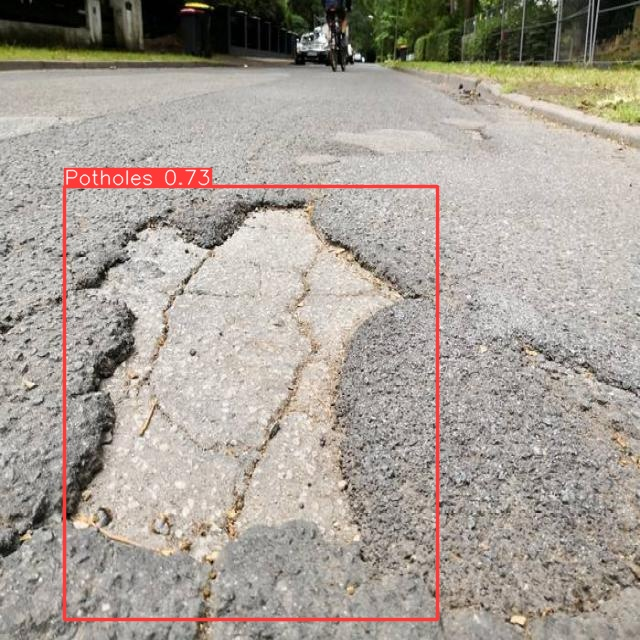

In [36]:
Image('/content/runs/detect/predict/142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg')

## Testing on Demo Video

In [37]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/demo.mp4: 384x640 1 Potholes, 103.5ms
video 1/1 (2/324) /content/demo.mp4: 384x640 1 Potholes, 25.8ms
video 1/1 (3/324) /content/demo.mp4: 384x640 1 Potholes, 25.8ms
video 1/1 (4/324) /content/demo.mp4: 384x640 2 Potholess, 25.8ms
video 1/1 (5/324) /content/demo.mp4: 384x640 1 Potholes, 25.8ms
video 1/1 (6/324) /content/demo.mp4: 384x640 1 Potholes, 25.8ms
video 1/1 (7/324) /content/demo.mp4: 384x640 (no detections), 25.8ms
video 1/1 (8/324) /content/demo.mp4: 384x640 1 Potholes, 22.5ms
video 1/1 (9/324) /content/demo.mp4: 384x640 1 Potholes, 18.6ms
video 1/1 (10/324) /content/demo.mp4: 384x640 1 Potholes, 18.6ms
video 1/1 (11/324) /content/demo.mp4: 384x640 (no detections), 18.6ms
video 1/1 (12/324) /content/demo.mp4: 384x640 1 Potholes, 18.6ms
video 1/1 (13/324) /content/demo.mp4: 

## Display the video

In [39]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [41]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)